# Linearization Methods

In [1]:
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from collections import namedtuple
from LinApp_FindSS import LinApp_FindSS
from LinApp_Deriv import LinApp_Deriv
from LinApp_Solve import LinApp_Solve

### Exercise 1


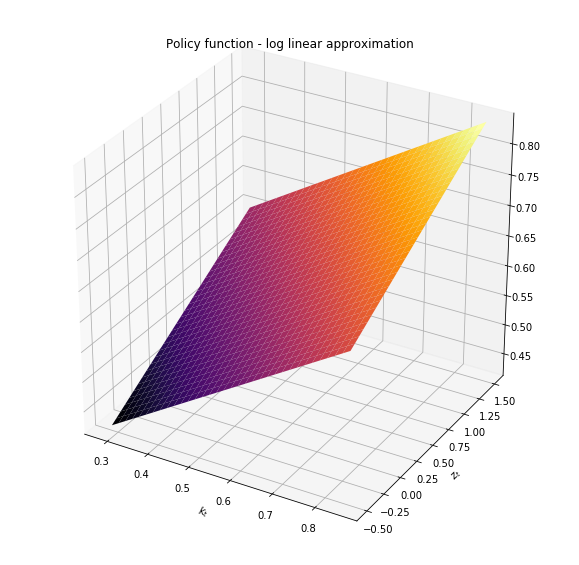

In [2]:
# Set the parameters
alpha  = 0.40
beta = 0.98
rho = 0.95
A = alpha*beta

def uhlig_params():
    k_bar = A**(1/1-alpha)
    F = 1/((k_bar**alpha-1)-1)
    G = (alpha + k_bar)/(k_bar - k_bar**alpha)
    H = alpha/(1-k_bar**(1-alpha))
    L = k_bar/(k_bar - k_bar**alpha)
    M = 1/(1-k_bar**(1-alpha))
    N = rho
    return F,G,H,L,M,N

def P_root(P):
    F,G,H,L,M,N = uhlig_params()
    error = (F*P**2) + G*P + H
    return error

def uhlig_coefficients():
    F,G,H,L,M,N = uhlig_params()
    P_guess = 0.5
    results = opt.root(P_root, P_guess, tol = 1e-10)
    P = results.x
    Q = -1*(L*N+M)/(F*N + F*P + G)
    return F,G,H,L,M,N,P,Q

F,G,H,L,M,N,P,Q = uhlig_coefficients()
k_bar = A**(1/1-alpha)
k_mesh = np.linspace(k_bar*0.5, k_bar*1.5, 100)
z_mesh = np.linspace(-0.5, 1.5, 100)

x,y = np.meshgrid(k_mesh, z_mesh)
policy = np.empty((100,100))
for i in range(100):
    for j in range(100):
        policy[i,j] = (1-P)*k_bar + P*(k_mesh[i]) + Q*k_bar*z_mesh[j]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(x, y, policy, rstride = 3, cstride = 3, cmap='inferno')
plt.title('Policy function - log linear approximation')
plt.ylabel('$z_t$')
plt.xlabel('$k_t$')
plt.show()

### Exercise 2


### Exercise 3


### Exercise 4


### Exercise 5


### Exercise 6


### Exercise 7


### Exercise 8


### Exercise 9
